# 14 迴歸法預測函數

我們認真的來做一下數據分析!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [2]:
x = np.linspace(0, 5, 50)

In [3]:
y = 1.2*x + 0.8

畫出圖形來。

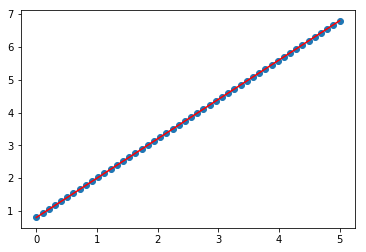

In [4]:
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

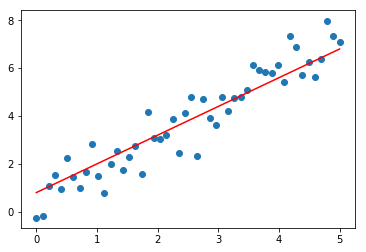

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn.svm` 裡的 `SVR` 來做各種迴歸。

In [7]:
from sklearn.svm import SVR

In [8]:
svr_lin = SVR(kernel='linear', C=1e3)

In [20]:
X = x.reshape(len(x),1)

In [24]:
svr_lin.fit(X,y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
Y = svr_lin.predict(X)

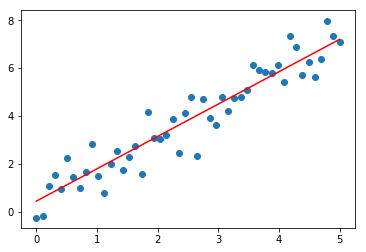

In [28]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')

## 2. 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [30]:
from sklearn.model_selection import train_test_split

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

我們在「訓練」這個函數時只有以下這些資料。

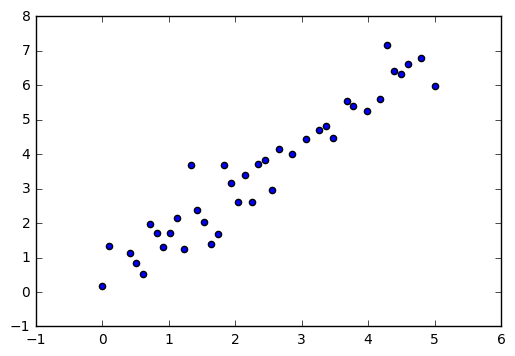

In [17]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [36]:
svr_lin = SVR(kernel='linear', C=1e3)
X_train = x_train.reshape(len(x_train),1)
svr_lin.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
Y_train = svr_lin.predict(X_train)

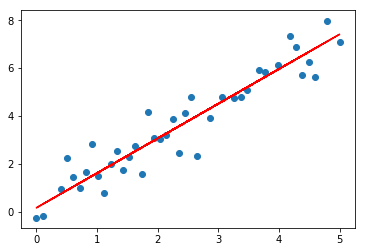

In [41]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

#### 用測試資料試試我們預測準不準

In [39]:
X_test = x_test.reshape(len(x_test),1)

In [42]:
Y_test = svr_lin.predict(X_test)

In [46]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)

In [47]:
mse

0.39921372448740139

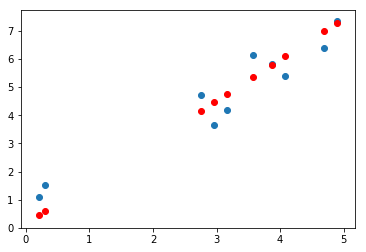

In [48]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, Y_test, c='r')

## 3. 不是線性的目標函數

這裡我們用個非線性的函數來生假數據:

$$f(x) = \sin(3.2x) + 0.8x$$

一樣準備加上一些 noise。

### 3. 生成假資料

In [52]:
x = np.linspace(0, 5, 50)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(50)

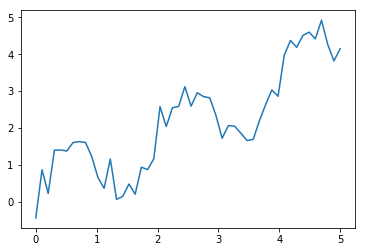

In [51]:
plt.plot(x, y)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#### 準備生這個函數

In [72]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.3)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=4)

In [73]:
X_train = x_train.reshape(len(x_train), 1)

In [74]:
svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
svr_poly.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### 看看訓練成果

In [75]:
X = x.reshape(len(x),1)

In [76]:
Y_rbf = svr_rbf.predict(X)
Y_lin = svr_lin.predict(X)
Y_poly = svr_poly.predict(X)

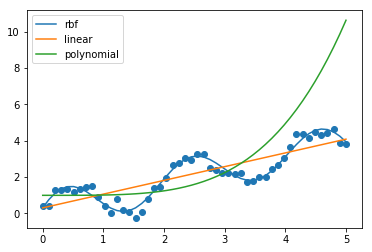

In [77]:
plt.scatter(x,y)

plt.plot(x, Y_rbf, label='rbf')
plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.legend()